In [1]:
# ------Import standard libraries------
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.fft import fft
from numpy.fft import fft

# import the cv2_imshow function  from patches to use in Google Collab
# import functions from the scipy.signal module for signal processing
from scipy.signal import butter, filtfilt, find_peaks, hamming
import scipy.signal as signal
#import and mount the drive module to access files and directories from Google Drive
#import pandas as pd
import os
import glob
import re

In [ ]:
directorio = os.getcwd()
subdirectorio = "DB"
subcarpeta_rostro = "Base de Datos Procesados"
archivo = "004_dedo.mp4"
ruta_video = str(os.path.join(directorio, subdirectorio, archivo))
csv_file = str(os.path.join(directorio, subdirectorio, archivo.replace(".mp4",".csv")))
print(ruta_video)
print(csv_file)

In [ ]:


def generar_rutas_videos(directorio_base, flag_dedo=True):
    """
    Genera las rutas de los archivos de video en el directorio especificado,
    filtrando por la presencia o ausencia del prefijo 'dedo'.
    
    Args:
    - directorio_base (str): El directorio donde se encuentran los archivos de video.
    - flag_dedo (bool): True para buscar videos con el prefijo 'dedo', False para buscar videos sin el prefijo.
    
    Returns:
    - list: Una lista con las rutas de los archivos de video que cumplen con el criterio.
    """
    # Usar glob para encontrar todos los archivos .mp4
    patron_busqueda = os.path.join(directorio_base, "*.mp4")
    rutas_totales = glob.glob(patron_busqueda)

    # Filtrar las rutas según el flag_dedo
    if flag_dedo:
        # Incluir solo archivos que contienen '_dedo' en el nombre
        rutas = [ruta for ruta in rutas_totales if "_dedo.mp4" in os.path.basename(ruta)]
    else:
        # Excluir archivos que contienen '_dedo' en el nombre
        rutas = [ruta for ruta in rutas_totales if "_dedo.mp4" not in os.path.basename(ruta)]
    
    # Imprimir las rutas encontradas para verificar
    for ruta in rutas:
        print(ruta)
    
    print(f"Total de videos encontrados: {len(rutas)}")
    return rutas

# Uso de la función
directorio_base = "DB"
rutas_dedo = generar_rutas_videos(directorio_base, flag_dedo=True)  # Debería devolver rutas con 'dedo'
rutas_no_dedo = generar_rutas_videos(directorio_base, flag_dedo=False)  # Debería devolver rutas sin 'dedo'


In [5]:
def obtener_rutas(numero_video, es_dedo):
    directorio = os.getcwd()
    subdirectorio = "DB"
    
    # Determinar el nombre del archivo en base a si es dedo o no
    if es_dedo:
        nombre_archivo = f"{numero_video}_dedo.mp4"
    else:
        nombre_archivo = f"{numero_video}.mp4"
    
    # Construir la ruta completa para el video
    ruta_video = os.path.join(directorio, subdirectorio, nombre_archivo)
    
    # Construir la ruta completa para el archivo CSV correspondiente
    csv_file = os.path.join(directorio, subdirectorio, f"{numero_video}.csv")
    
    # Imprimir las rutas
    print("Ruta del video:", ruta_video)
    print("Ruta del archivo CSV:", csv_file)

    return ruta_video, csv_file

def obtener_rutas_array(numero_video, es_dedo):
    directorio = os.getcwd()
    subdirectorio_csv = "DB"

    
    # Determinar el nombre del archivo en base a si es dedo o no
    if es_dedo:
        nombre_archivo_hue = f"{numero_video}_dedo_hue_array.npy"
        nombre_archivo_saturation = f"{numero_video}_dedo_saturation_array.npy"
        subdirectorio = "Finger_arrays"

    else:
        nombre_archivo_hue = f"{numero_video}_hue_array.npy"
        nombre_archivo_saturation = f"{numero_video}_saturation_array.npy"
        subdirectorio = "Face_arrays"
    
    # Construir la ruta completa para el video
    ruta_array_hue = os.path.join(directorio, subdirectorio, nombre_archivo_hue)
    ruta_array_saturation = os.path.join(directorio, subdirectorio, nombre_archivo_saturation)
    # Construir la ruta completa para el archivo CSV correspondiente
    csv_file = os.path.join(directorio, subdirectorio_csv, f"{numero_video}.csv")
    # Verificar si los archivos existen y si existen devuelvelos, si no, manda error
    if not os.path.exists(ruta_array_hue):
        raise FileNotFoundError(f"El archivo {ruta_array_hue} no existe.")
    if not os.path.exists(ruta_array_saturation):
        raise FileNotFoundError(f"El archivo {ruta_array_saturation} no existe.")
    if not os.path.exists(csv_file):
        raise FileNotFoundError(f"El archivo {csv_file} no existe.")
    
    # Imprimir las rutas
    print("Ruta del archivo hue:", ruta_array_hue)
    print("Ruta del archivo saturation:", ruta_array_saturation)
    print("Ruta del archivo CSV:", csv_file)

    return ruta_array_hue, ruta_array_saturation, csv_file


In [3]:
def obtener_nombre_archivo(ruta):
    """
    Extrae el nombre del archivo sin la extensión de una ruta completa.
    
    Args:
    - ruta (str): La ruta completa del archivo.
    
    Returns:
    - str: El nombre del archivo sin la extensión.
    """
    # Extraer el nombre del archivo con la extensión
    nombre_con_extension = os.path.basename(ruta)
    
    # Separar la extensión y devolver solo el nombre
    nombre_sin_extension = os.path.splitext(nombre_con_extension)[0]
    
    return nombre_sin_extension

def rutas_csv(directorio_csv):
    """
    Genera las rutas de los archivos de video en el directorio especificado,
    filtrando por la presencia o ausencia del prefijo 'dedo'.
    
    Args:
    - directorio_base (str): El directorio donde se encuentran los archivos de video.
    - flag_dedo (bool): True para buscar videos con el prefijo 'dedo', False para buscar videos sin el prefijo.
    
    Returns:
    - list: Una lista con las rutas de los archivos de video que cumplen con el criterio.
    """
    # Usar glob para encontrar todos los archivos .mp4
    patron_busqueda = os.path.join(directorio_csv, "*.csv")
    rutas = glob.glob(patron_busqueda)
    
    # Imprimir las rutas encontradas para verificar
    for ruta in rutas:
        print(ruta)
    
    print(f"Total de videos encontrados: {len(rutas)}")
    return rutas

def rutas_arrays(directorio_arrays, nombre_base):
    """
    Busca y devuelve las rutas de los archivos Numpy que coinciden con un nombre base específico y contienen
    'hue_array.npy' o 'saturation_array.npy' en el directorio especificado.
    
    Args:
    - directorio_arrays (str): El directorio donde se encuentran los archivos.
    - nombre_base (str): Nombre base del archivo, como '001', para filtrar los archivos relevantes.
    
    Returns:
    - tuple: Tuplas que contienen listas de rutas para archivos de hue y saturation.
    """
    # Construir patrones de búsqueda para los archivos de hue y saturation
    patron_busqueda_hue = os.path.join(directorio_arrays, f"{nombre_base}*hue_array.npy")
    patron_busqueda_saturation = os.path.join(directorio_arrays, f"{nombre_base}*saturation_array.npy")
    
    # Usar glob para encontrar todos los archivos que coinciden con el patrón
    ruta_hue = glob.glob(patron_busqueda_hue)
    ruta_saturation = glob.glob(patron_busqueda_saturation)

    # Imprimir las rutas encontradas para verificar
    print("Archivos de Hue encontrados:")
    for ruta in ruta_hue:
        print(ruta)

    print("Archivos de Saturation encontrados:")
    print(ruta_saturation)
        
    print(f"Total de archivos encontrados: {len(ruta_hue) + len(ruta_saturation)}")
    
    return ruta_hue[0], ruta_saturation[0]




In [267]:
rutas_archivos = rutas_csv("DB")

for ruta in rutas_archivos:
    nombre_archivo = obtener_nombre_archivo(ruta)
    print(nombre_archivo)
    ruta_array_hue, ruta_array_saturation = rutas_arrays("Finger_arrays", nombre_archivo)
    #verificar si las listas no estan vacias
    if ruta_array_hue and ruta_array_saturation:
        print("Archivos encontrados")
    else:
        print("No se encontraron archivos")

DB\001.csv
DB\002.csv
DB\003.csv
DB\004.csv
DB\005.csv
DB\006.csv
DB\007.csv
DB\009.csv
DB\010.csv
DB\011.csv
DB\012.csv
DB\013.csv
DB\014.csv
DB\015.csv
DB\016.csv
DB\017.csv
DB\018.csv
DB\019.csv
DB\020.csv
DB\021.csv
DB\022.csv
DB\023.csv
DB\024.csv
DB\025.csv
DB\026.csv
DB\027.csv
DB\028.csv
DB\029.csv
DB\030.csv
DB\031.csv
DB\032.csv
DB\033.csv
DB\034.csv
DB\035.csv
DB\036.csv
DB\037.csv
DB\038.csv
DB\039.csv
DB\040.csv
DB\041.csv
Total de videos encontrados: 40
001
Archivos de Hue encontrados:
Finger_arrays\001_dedo_hue_array.npy
Archivos de Saturation encontrados:
['Finger_arrays\\001_dedo_saturation_array.npy']
Total de archivos encontrados: 2
Archivos encontrados
002
Archivos de Hue encontrados:
Finger_arrays\002_dedo_hue_array.npy
Archivos de Saturation encontrados:
['Finger_arrays\\002_dedo_saturation_array.npy']
Total de archivos encontrados: 2
Archivos encontrados
003
Archivos de Hue encontrados:
Finger_arrays\003_dedo_hue_array.npy
Archivos de Saturation encontrados:
['Fi

In [6]:
numero_video = "001"

_, _, csv_file = obtener_rutas_array(numero_video, es_dedo=False)
ruta_hue, ruta_saturation = rutas_arrays("Face_arrays", numero_video)
print(ruta_hue)
print(ruta_saturation)
#nombre_archivo = obtener_nombre_archivo(rutas_no_dedo[3])
#print(nombre_archivo)
saturation_array = np.load(ruta_saturation)
hue_array = np.load(ruta_hue)
fs = 30

Ruta del archivo hue: c:\Users\juanv\Documents\HRV_Analysis\Face_arrays\001_hue_array.npy
Ruta del archivo saturation: c:\Users\juanv\Documents\HRV_Analysis\Face_arrays\001_saturation_array.npy
Ruta del archivo CSV: c:\Users\juanv\Documents\HRV_Analysis\DB\001.csv
Archivos de Hue encontrados:
Face_arrays\001_hue_array.npy
Archivos de Saturation encontrados:
['Face_arrays\\001_saturation_array.npy']
Total de archivos encontrados: 2
Face_arrays\001_hue_array.npy
Face_arrays\001_saturation_array.npy


In [14]:
fs = 30  # Frecuencia de muestreo en Hz
min_freq = 60 / 60  # Frecuencia cardíaca mínima en Hz (40 latidos por minuto)
max_freq = 100 / 60  # Frecuencia cardíaca máxima en Hz (200 latidos por minuto)

# Filtrar la señal de saturación (puedes aplicar un filtro pasa banda si es necesario)
filtered_saturation = saturation_array  # No es necesario aplicar un filtro en este ejemplo

# Encontrar los picos en la señal de saturación
peaks, _ = find_peaks(filtered_saturation, height=0)  # 'height' puede ajustarse según tus datos

# Calcular los intervalos entre picos (tiempos entre latidos)
rr_intervals = np.diff(peaks) / fs  # Convertir a segundos

# Filtrar los intervalos válidos dentro del rango de frecuencia cardíaca esperada
valid_intervals = rr_intervals[(rr_intervals > 1 / max_freq) & (rr_intervals < 1 / min_freq)]

# Calcular la frecuencia cardíaca promedio a partir de los intervalos válidos
heart_rate = 60 / np.mean(valid_intervals)  # Latidos por minuto

print("Frecuencia cardíaca estimada:", heart_rate)

Frecuencia cardíaca estimada: nan


C:\Users\juanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\juanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import cv2
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
# Carga el clasificador Haarcascade preentrenado para detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Carga el video desde tu computadora a Google Colab
video_filename = ruta_video
# Abre el video
cap = cv2.VideoCapture(video_filename)
fps = cap.get(cv2.CAP_PROP_FPS)
fs = round(fps)
print("Frames per second:",fs)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Frame count:",frame_count) #Full video

In [ ]:
#Para video de rostro
saturation_values = []  # Lista para almacenar los valores de saturación
hue_values = []  # Lista para almacenar los valores de tono
# Leer el video fotograma a fotograma
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Salir del bucle si no quedan más fotogramas

    # Convertir a escala de grises para la detección de rostros
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar rostros
    faces = face_cascade.detectMultiScale(gray, 1.1, 7)

    if len(faces) > 0:
        # Tomar el primer rostro detectado
        x, y, w, h = faces[0]

        # Definir una ROI para el rostro entero
        roi = frame[y:y+h, x:x+w]

        # Convertir la ROI a HSV
        hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv_roi)

        h = cv2.normalize(h, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        s = cv2.normalize(s, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        # Calcular la intensidad promedio del canal de saturación en la ROI
        saturation_values.append(np.mean(s))

        # Calcular la intensidad promedio del canal de tono en la ROI
        hue_values.append(np.mean(h))

# Convertir la lista de valores de saturación a un array de numpy
saturation_array = np.array(saturation_values)
# Convertir la lista de valores de tono a un array de numpy
hue_array = np.array(hue_values)






In [ ]:
#Para video de dedo
saturation_values = []  # Lista para almacenar los valores de saturación
hue_values = []  # Lista para almacenar los valores de tono

# Leer el video fotograma a fotograma
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Salir del bucle si no quedan más fotogramas

    # Convertir el fotograma completo a HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Extraer el canal de saturación
    h, s , _ = cv2.split(hsv_frame)

    # Calcular la intensidad promedio del canal de saturación en el fotograma completo
    saturation_values.append(np.mean(s))
    # Calcular la intensidad promedio del canal de tono en el fotograma completo
    hue_values.append(np.mean(h))


# Convertir la lista de valores de saturación a un array de numpy
saturation_array = np.array(saturation_values)
# Convertir la lista de valores de tono a un array de numpy
hue_array = np.array(hue_values)



In [ ]:
def arrays_name(directorio, nombre_base):
        # Crear los nombres de archivo completos
    saturation_filename = os.path.join(directorio, f"{nombre_base}_saturation_array.npy")
    hue_filename = os.path.join(directorio, f"{nombre_base}_hue_array.npy")
    return  hue_filename, saturation_filename

def guardar_arrays(directorio, nombre_base, saturation_array, hue_array):
    """
    Guarda los arrays de saturación y tono en el directorio especificado con un nombre de archivo basado en nombre_base.
    
    Args:
    - directorio (str): Directorio donde se guardarán los archivos.
    - nombre_base (str): Nombre base del archivo para usar en el nombre del archivo guardado.
    - saturation_array (numpy.ndarray): Array de saturación para guardar.
    - hue_array (numpy.ndarray): Array de tono para guardar.
    """
    if not os.path.exists(directorio):
        os.makedirs(directorio)
    hue_filename, saturation_filename = arrays_name(directorio, nombre_base)
    
    # Guardar los arrays
    np.save(saturation_filename, saturation_array)
    np.save(hue_filename, hue_array)
    
    print(f"Archivos guardados: {saturation_filename} y {hue_filename}")

In [ ]:
# Create the directory if it doesn't exist


# Save the arrays
nombre_base = obtener_nombre_archivo(ruta_video)
guardar_arrays("Image_analysis", nombre_base, saturation_array, hue_array)


In [ ]:
np.save('saturation_array.npy', saturation_array)
np.save('hue_array.npy', hue_array)
# Cargar los arrays más tarde
loaded_saturation_array = np.load('saturation_array.npy')
loaded_hue_array = np.load('hue_array.npy')
print(loaded_hue_array[:10])

In [ ]:
def normalize(array):
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    return normalized_array

In [ ]:
saturation_array = normalize(saturation_array)
hue_array = normalize(hue_array)

In [9]:
#crea una funcion que una los dos arrays sacando el promedio en cada uno de los valores y guardandolo en un nuevo array
def average_arrays(array1, array2):
    """
    Calcula el promedio de dos arrays y devuelve un nuevo array con los valores promediados.
    
    Args:
    - array1 (numpy.ndarray): Primer array para promediar.
    - array2 (numpy.ndarray): Segundo array para promediar.
    
    Returns:
    - numpy.ndarray: Array con los valores promediados.
    """
    # Calcular el promedio de los dos arrays
    averaged_array = (array1 + array2) / 2
    return averaged_array

In [10]:
averaged_array = average_arrays(saturation_array, hue_array)
print(averaged_array[:10])
print(hue_array[:10])
print(saturation_array[:10])

[0.40081679 0.39754459 0.38886869 0.40334139 0.41262503 0.40604476
 0.38961775 0.40155282 0.3978936  0.39990488]
[0.29307233 0.28397146 0.29312488 0.30197973 0.31857205 0.31424751
 0.3148688  0.31018953 0.30531056 0.29707491]
[0.50856125 0.51111772 0.4846125  0.50470304 0.506678   0.497842
 0.4643667  0.49291612 0.49047664 0.50273484]


In [11]:

# Aplicar un filtro pasa banda para obtener la señal del pulso
lowcut = 1.1
highcut = 1.6

# Función para crear un filtro pasa banda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Función para aplicar el filtro
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filtrar la señal
filtered_saturation = butter_bandpass_filter(saturation_array, lowcut, highcut, fs, order=5)
filtered_hue = butter_bandpass_filter(hue_array, lowcut, highcut, fs, order=5)
filtered_averaged = butter_bandpass_filter(averaged_array, lowcut, highcut, fs, order=5)

# Aplicar una ventana de Hamming
window_saturation = hamming(len(filtered_saturation))
filtered_saturation = filtered_saturation * window_saturation

window_hue = hamming(len(filtered_hue))
filtered_hue = filtered_hue * window_hue

window_averaged = hamming(len(filtered_averaged))
filtered_averaged = filtered_averaged * window_averaged


# Realizar FFT en la señal filtrada
saturation_fft = fft(filtered_saturation)
hue_fft = fft(filtered_hue)
averaged_fft = fft(filtered_averaged)

# Calcular las frecuencias correspondientes
freqs_saturation = np.fft.fftfreq(len(filtered_saturation), 1/fs)
freqs_hue = np.fft.fftfreq(len(filtered_hue), 1/fs)
freqs_averaged = np.fft.fftfreq(len(filtered_averaged), 1/fs)

# Encuentra la frecuencia con la magnitud más alta en el rango de la frecuencia cardíaca
idx_saturation = np.argmax(np.abs(saturation_fft))
pulse_freq_saturation = freqs_saturation[idx_saturation]
heart_rate_saturation = abs(pulse_freq_saturation * 60)  # Convertir a latidos por minuto

idx_hue = np.argmax(np.abs(hue_fft))
pulse_freq_hue = freqs_hue[idx_hue]
heart_rate_hue = abs(pulse_freq_hue * 60)  # Convertir a latidos por minuto

idx_averaged = np.argmax(np.abs(averaged_fft))
pulse_freq_averaged = freqs_averaged[idx_averaged]
heart_rate_averaged = abs(pulse_freq_averaged * 60)  # Convertir a latidos por minuto




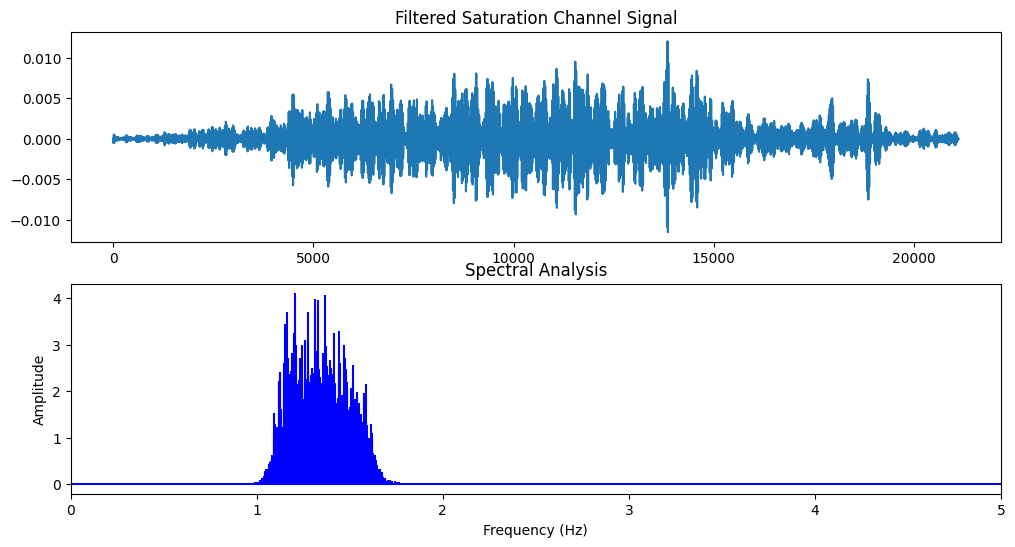

Estimated Heart Rate in Saturation: 72.4 beats per minute


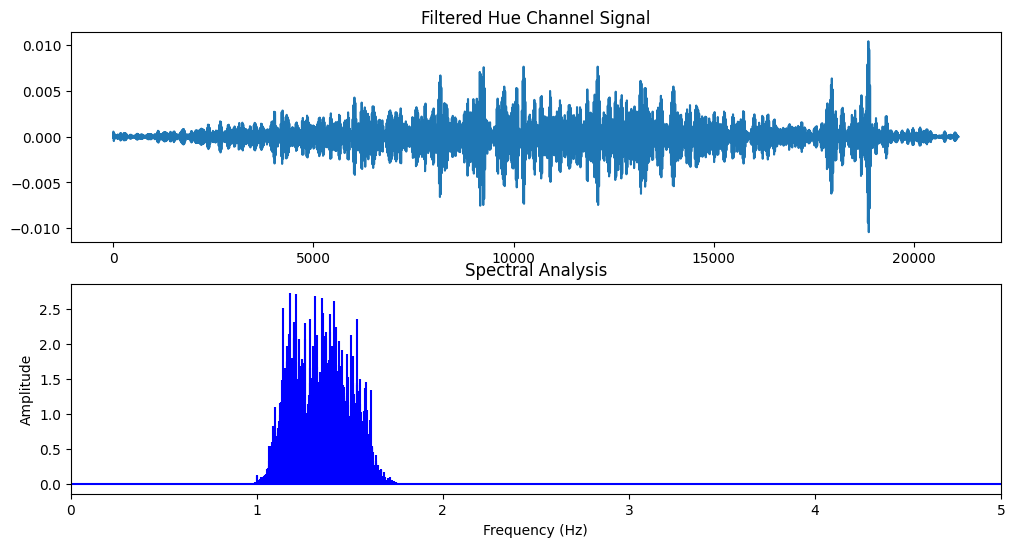

Estimated Heart Rate in Hue: 70.9 beats per minute


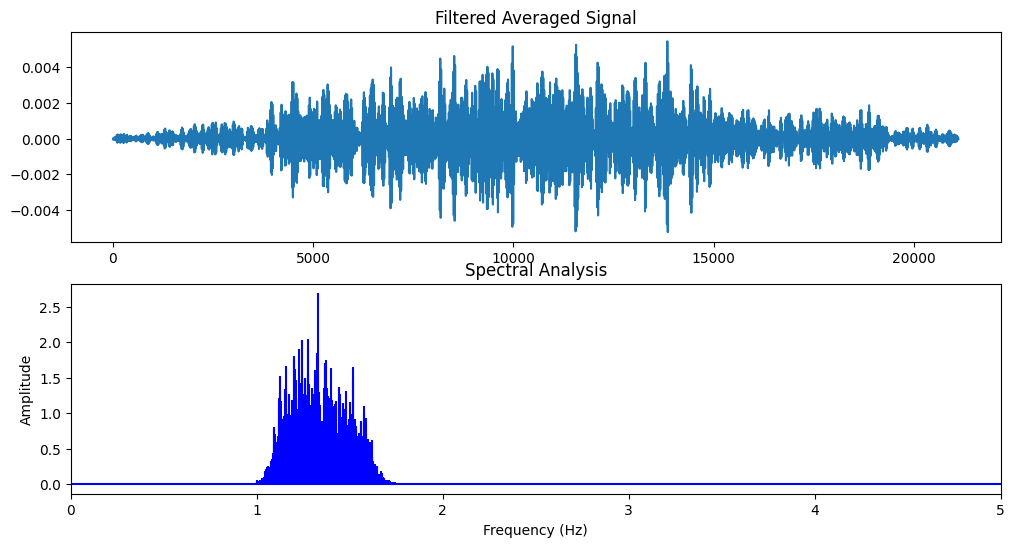

Estimated Heart Rate in Averaged Signal: 79.8 beats per minute


In [12]:

# Mostrar los resultados de saturacion
plt.figure(figsize=(12, 6))

# Mostrar la señal temporal filtrada
plt.subplot(2, 1, 1)
plt.plot(filtered_saturation)
plt.title('Filtered Saturation Channel Signal')

# Mostrar el espectro de la señal en saturación
plt.subplot(2, 1, 2)
plt.stem(freqs_saturation, np.abs(saturation_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('Spectral Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5)  # Limitar el eje x al rango de interés para la frecuencia cardíaca
plt.show()

print(f'Estimated Heart Rate in Saturation: {heart_rate_saturation:.1f} beats per minute')

# Mostrar los resultados de tono
plt.figure(figsize=(12, 6))

# Mostrar la señal temporal filtrada
plt.subplot(2, 1, 1)
plt.plot(filtered_hue)
plt.title('Filtered Hue Channel Signal')

# Mostrar el espectro de la señal en tono
plt.subplot(2, 1, 2)
plt.stem(freqs_hue, np.abs(hue_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('Spectral Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5)  # Limitar el eje x al rango de interés para la frecuencia cardíaca
plt.show()

print(f'Estimated Heart Rate in Hue: {heart_rate_hue:.1f} beats per minute')

# Mostrar los resultados de la señal promediada
plt.figure(figsize=(12, 6))

# Mostrar la señal temporal filtrada
plt.subplot(2, 1, 1)
plt.plot(filtered_averaged)
plt.title('Filtered Averaged Signal')

# Mostrar el espectro de la señal promediada
plt.subplot(2, 1, 2)
plt.stem(freqs_averaged, np.abs(averaged_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('Spectral Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5)  # Limitar el eje x al rango de interés para la frecuencia cardíaca
plt.show()

print(f'Estimated Heart Rate in Averaged Signal: {heart_rate_averaged:.1f} beats per minute')



# Libera el capturador de video
#cap.release()

In [13]:
#------Compare to the heart rate calculated from pulse oximeter measurements------

# import the pulse oximeter .csv file
data_video= pd.read_csv(csv_file)

# extract the data from the PULSE column
pulse_signal = data_video['PULSE']

# Take only the numerical values of the signal
pulse_signal = pd.to_numeric(pulse_signal, errors='coerce')

# print the size of the signal
print("Signal size:", pulse_signal.size)

# calculate and print the average value of the Heart Rate
heart_rate_csv = np.mean(pulse_signal)
print("\nHeart rate in csv: {:.2f} bpm".format(heart_rate_csv))

# calculate and print the error
error_saturation=abs(heart_rate_saturation-heart_rate_csv)
print("\nError saturación: {:.2f} bpm".format(error_saturation))

error_hue=abs(heart_rate_hue-heart_rate_csv)
print("\nError tono: {:.2f} bpm".format(error_hue))

error_averaged=abs(heart_rate_averaged-heart_rate_csv)
print("\nError promedio: {:.2f} bpm".format(error_averaged))


Signal size: 757

Heart rate in csv: 69.64 bpm

Error saturación: 2.75 bpm

Error tono: 1.22 bpm

Error promedio: 10.17 bpm
